In [60]:
#Import libraries

import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import math
import matplotlib.pyplot as plt
import collections, operator
warnings.filterwarnings("ignore")

In [61]:
def plot_cluster(cluster, Z, X):
    fig = plt.subplot(111)
    var_plot_list = CDRPKM_LIST
    count=0
    for i in range(len(X)):
        if(Z[i] == cluster):
            fig.plot(CDRPKM_LIST, X[i])
            count+=1
    title = "HMM "+ str(cluster) + " : " + str(count) + " points "
    plt.title(title)
    plt.show()
    
def fit_HMM(components, covariance):
    clf = hmm.GaussianHMM(n_components=components,covariance_type=covariance) #consider Gaussian Emissions
    return clf


In [62]:
#Dataset

df_main = pd.read_csv('Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_main.head(5))
X = np.log2(df_main.values)

print("****************************")
print("First 5 log2 values\n",X[:5])

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017
****************************
First 5 log2 values
 [[ 3.09420655  2.55572822  2.58256628]
 [ 3.79053016  2.04560095  2.78293239]
 [ 5.30220154  5.96591207  6.40121497]
 [ 1.07374244  1.80274443  1.54007587]
 [ 3.32348535  4.09312932  3.24549826]]


In [63]:
print(X.shape)
print(X[0])

(11087, 3)
[ 3.09420655  2.55572822  2.58256628]


In [64]:
#Fit HMM

remodel = fit_HMM(7,'full')
remodel.fit(X) #get sequence of states using Viterbi
Z = remodel.predict(X)

In [65]:
print("Hidden states samples")
counts = {}
for idx,i in enumerate(Z):
    if(idx%1000==0):
        print("State of", idx, " is ",i)
    if(i not in counts):
        counts[i]=1
    else:
        counts[i]+=1
print("Counts of each HMM are")
for i in range(0,len(counts)):
    print("HMM",i,":",counts[i])

Hidden states samples
State of 0  is  3
State of 1000  is  2
State of 2000  is  2
State of 3000  is  1
State of 4000  is  2
State of 5000  is  0
State of 6000  is  5
State of 7000  is  5
State of 8000  is  1
State of 9000  is  3
State of 10000  is  3
State of 11000  is  1
Counts of each HMM are
HMM 0 : 1065
HMM 1 : 2234
HMM 2 : 1992
HMM 3 : 1900
HMM 4 : 1327
HMM 5 : 630
HMM 6 : 1939


In [66]:
print("Transition matrix")
print(remodel.transmat_)
print()

Transition matrix
[[ 0.110558    0.17163163  0.17372591  0.1521393   0.13729839  0.07278018
   0.18186659]
 [ 0.09153757  0.19278279  0.15561366  0.16875095  0.13594807  0.06559646
   0.1897705 ]
 [ 0.11185036  0.18741292  0.15438925  0.15582298  0.14072009  0.06726176
   0.18254264]
 [ 0.1069236   0.18375819  0.15385662  0.16951267  0.1368621   0.0670507
   0.18203612]
 [ 0.11605228  0.16935146  0.16561135  0.15788477  0.14464296  0.07351978
   0.17293739]
 [ 0.13023401  0.13892261  0.1177569   0.13899036  0.13970669  0.20308351
   0.13130593]
 [ 0.09826927  0.19269852  0.15616164  0.16281097  0.13821568  0.06375614
   0.1880878 ]]



In [67]:
print("Means and vars of each hidden state")
for i in range(remodel.n_components):
    print("Hidden state {0}".format(i))
    print("mean = ", remodel.means_[i])
    print("var = ", remodel.covars_[i])
    print()

Means and vars of each hidden state
Hidden state 0
mean =  [ 1.22295366  1.02113154  0.97553343]
var =  [[ 2.60333775  1.92281315  1.65346621]
 [ 1.92281315  2.53889508  1.50513174]
 [ 1.65346621  1.50513174  2.32337216]]

Hidden state 1
mean =  [ 3.57263687  3.69591086  3.82605926]
var =  [[ 1.51135518  1.21863128  1.14029559]
 [ 1.21863128  1.37464945  1.17989514]
 [ 1.14029559  1.17989514  1.27928099]]

Hidden state 2
mean =  [ 4.90264385  5.13110307  5.08289113]
var =  [[ 1.68955592  1.54376939  1.45389684]
 [ 1.54376939  1.61719197  1.50663857]
 [ 1.45389684  1.50663857  1.5153593 ]]

Hidden state 3
mean =  [ 3.10196382  2.93669644  3.14947134]
var =  [[ 1.52195257  1.27910465  1.18312972]
 [ 1.27910465  1.64468987  1.23554895]
 [ 1.18312972  1.23554895  1.4431654 ]]

Hidden state 4
mean =  [ 1.75111883  2.01165195  2.42753784]
var =  [[ 2.41940452  1.43440236  1.4269689 ]
 [ 1.43440236  2.03868652  1.48807171]
 [ 1.4269689   1.48807171  1.76384512]]

Hidden state 5
mean =  [ 6.31

In [68]:
for idx, hidden_state in enumerate(remodel.covars_):
    print("For hidden state",idx)
    rho_12 = hidden_state[0][1]/math.sqrt(hidden_state[0][0]*hidden_state[1][1])
    print("Rho12:",rho_12)
    rho_23 = hidden_state[1][2]/math.sqrt(hidden_state[1][1]*hidden_state[2][2])
    print("Rho23",rho_23)
    rho_13 = hidden_state[0][2]/math.sqrt(hidden_state[0][0]*hidden_state[2][2])
    print("Rho13:",rho_13)
    print("Rho12*Rho23:", rho_12*rho_23)
    print("****************************\n")

For hidden state 0
Rho12: 0.74791018691
Rho23 0.61971605463
Rho13: 0.672311708672
Rho12*Rho23: 0.463491950249
****************************

For hidden state 1
Rho12: 0.845460010071
Rho23 0.88974274668
Rho13: 0.820070524733
Rho12*Rho23: 0.752241911569
****************************

For hidden state 2
Rho12: 0.93393220597
Rho23 0.9624329525
Rho13: 0.908635075617
Rho12*Rho23: 0.898847130426
****************************

For hidden state 3
Rho12: 0.808469253931
Rho23 0.801973269301
Rho13: 0.798314004576
Rho12*Rho23: 0.648370730705
****************************

For hidden state 4
Rho12: 0.64586466145
Rho23 0.784726663622
Rho13: 0.690764547981
Rho12*Rho23: 0.506827220931
****************************

For hidden state 5
Rho12: 0.980578881951
Rho23 0.977034587844
Rho13: 0.95062807867
Rho12*Rho23: 0.958059483775
****************************

For hidden state 6
Rho12: 0.90102075255
Rho23 0.934887780263
Rho13: 0.874966404235
Rho12*Rho23: 0.842353291322
****************************



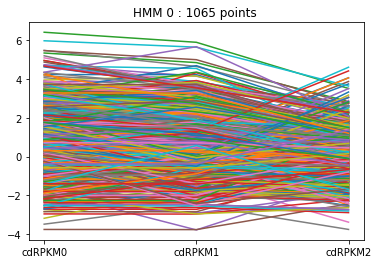

In [ ]:
for i in range(0,remodel.n_components):
    plot_cluster(i,Z,X)
    print('\n')

In [ ]:
fitted_clusters = []
# Append empty clusters
for i in range(0,remodel.n_components):
    fitted_clusters.append([])
    
for idx, i in enumerate(Z):
    fitted_clusters[Z[idx]].append(list(X[idx]))
    
for i in range(0,3):
    dataframe = pd.DataFrame(np.array(fitted_clusters[i]), columns = list("012"))
    print("Descriptive statistics for cluster", i+1, "is")
    print(dataframe.describe())
    print("*************************************************************************")
    print("*************************************************************************")
    print("*************************************************************************")